In [1]:
from create_overview import ResultAggregator
from copy import deepcopy
import re
from ast import literal_eval
from statistics import mean
import numpy as np
from collections import defaultdict
import pandas as pd
from pprint import pprint
from pathlib import Path

# 1. Starting

- There are two ways to start the code
 - You can either directly fetch the data from the project from [wandb](https://wandb.ai/site) or
 - you can read the data from a pre-existing csv file
- Note: Whenever you fetch the data directly from wandb, the data is automatically stored in a csv file called ```current_wandb_results_unprocessed.csv```. This measurement is taken, because downloading the data from wandb can take a while and sometimes even be interrupted due to connection issues (```Read timed out.``` etc.). Therefore, having a csv file can speed up the data reading.
- Initializing the object can happen in two ways, depending on whether you want to fetch the data from wandb or whether you want to read it from an existing csv file
- To fetch the data directly from wand to you need to pass a valid wand api key:

```
ra = ResultAggregator(wandb_api_key={WAND_API_KEY})

```
- To use the data from an existing csv file, you need to pass the path to the csv file (in the example below, the path to the automatically generated csv file is given):

```
ra = ResultAggregator(path_to_csv_export="current_wandb_results_unprocessed.csv")

```

- Optionally, you can set the argument ```verbose_logging```to ```False```. This might be usefule, to avoid overwhelming logging messages either in the terminal or in a notebook cell. The logs are saved in a log file in the log directory anyway.
- Passing the argument ```verbose_logging``` can be done like this:

```
ra = ResultAggregator(wandb_api_key={WAND_API_KEY}, verbose_logging=False)

```

```
ra = ResultAggregator(path_to_csv_export="current_wandb_results_unprocessed.csv", verbose_logging=False)

```

- It is important to note that all overviews and aggregates evolves around the score `macro-f1`. But you can overwrite this by passing `score` with the name of the score you are interested in, like this:

```
ra = ResultAggregator(path_to_csv_export="current_wandb_results_unprocessed.csv", score='micro-f1')

```
 

In [2]:
wandb_api_key = "3b7e4cee8259b9c6522aa3adef3833e6c109f000"
ra = ResultAggregator(wandb_api_key=wandb_api_key, verbose_logging=False)
#ra = ResultAggregator(path_to_csv_export="current_wandb_results_unprocessed.csv", verbose_logging=False)


Traceback (most recent call last):
  File "/Users/vetonmatoshi/Documents/Git/LEXTREME/utils/create_overview.py", line 164, in fetch_data
    entry["finetuning_task"] = x.config['finetuning_task']
KeyError: 'finetuning_task'
Traceback (most recent call last):
  File "/Users/vetonmatoshi/Documents/Git/LEXTREME/utils/create_overview.py", line 164, in fetch_data
    entry["finetuning_task"] = x.config['finetuning_task']
KeyError: 'finetuning_task'
Traceback (most recent call last):
  File "/Users/vetonmatoshi/Documents/Git/LEXTREME/utils/create_overview.py", line 164, in fetch_data
    entry["finetuning_task"] = x.config['finetuning_task']
KeyError: 'finetuning_task'
Traceback (most recent call last):
  File "/Users/vetonmatoshi/Documents/Git/LEXTREME/utils/create_overview.py", line 164, in fetch_data
    entry["finetuning_task"] = x.config['finetuning_task']
KeyError: 'finetuning_task'
Traceback (most recent call last):
  File "/Users/vetonmatoshi/Documents/Git/LEXTREME/utils/create_overv

In [3]:
ra.remove_languages('nb')

# 2. General information

- When fetching the data from wandb, the data is processed and saved to a dataframe called `results` which is an object variable
- **In contains only runs that are finished. Failed or crashed runs on wandb have been removed**
- You can access the processed data like this `ra.results`
- This data will be used to calculate the scores
- All overviews with the calculated aggregate scores will be saved to dataframes as well, which can be accessed likewise



# 2. Overviews

- The code was writing while some runs for certain had not been finished 
- Therefore, you can specify whether the generated overviews should consider only taks whose run had been completed entirely. This is automatically done by setting ```only_completed_tasks```to ```True``` as a default value.
- In case you want to see interim results, including tasks that have not been completed yet, you can set ```only_completed_tasks```to ```False``` when intitiliazing:

```
ra = ResultAggregator(path_to_csv_export="current_wandb_results_unprocessed.csv", only_completed_tasks=False)

```

- The code will create a bunch of different overviews that will be described in the following

## 2.1. Incomplete tasks

- If you want to generate an overview of incomplete tasks you run the following: `ra.check_seed_per_task()`
- This method will check if all task have the required number of finished runs with the seeds 1,2,3


In [4]:
seed_check = ra.check_seed_per_task()
seed_check.head(15)

,finetuning_task,_name_or_path,language,missing_seeds
0,,,,


##  2.2. Overviews along scores

- The method ```create_overview_of_results_per_seed()``` will generate an overview of the required score per seed and give a mean value. If not specified otherwise, the score defined during initializing will be used, i.e. `macro-f1`

In [5]:
ra.create_overview_of_results_per_seed()



seed,dataset,finetuning_task,task_type,_name_or_path,language,1,2,3,mean_over_seeds,standard_deviation
0,brazilian_court_decisions,brazilian_court_decisions_judgment,SLTC,distilbert-base-multilingual-cased,pt,0.499619,0.474800,0.533155,0.502525,0.029286
1,brazilian_court_decisions,brazilian_court_decisions_judgment,SLTC,microsoft/Multilingual-MiniLM-L12-H384,pt,0.434852,0.576685,0.469231,0.493589,0.073987
2,brazilian_court_decisions,brazilian_court_decisions_judgment,SLTC,microsoft/mdeberta-v3-base,pt,0.655753,0.693536,0.624596,0.657961,0.034523
3,brazilian_court_decisions,brazilian_court_decisions_judgment,SLTC,neuralmind/bert-base-portuguese-cased,pt,0.595290,0.715128,0.624258,0.644892,0.062527
4,brazilian_court_decisions,brazilian_court_decisions_judgment,SLTC,xlm-roberta-base,pt,0.628656,0.638225,0.695681,0.654187,0.036252
...,...,...,...,...,...,...,...,...,...,...
278,swiss_judgment_prediction,swiss_judgment_prediction,SLTC,dlicari/Italian-Legal-BERT,it,0.669922,0.519543,0.629266,0.606244,0.077788
279,swiss_judgment_prediction,swiss_judgment_prediction,SLTC,microsoft/Multilingual-MiniLM-L12-H384,all,0.671795,0.667385,0.690082,0.676421,0.012035
280,swiss_judgment_prediction,swiss_judgment_prediction,SLTC,microsoft/mdeberta-v3-base,all,0.681537,0.696978,0.691897,0.690137,0.007870
281,swiss_judgment_prediction,swiss_judgment_prediction,SLTC,xlm-roberta-base,all,0.673227,0.693169,0.681393,0.682596,0.010025


- If you want to to generate an overview for another score, let's say `micro-f1`, you can pass the name of the score as a variable to the function


In [6]:
ra.create_overview_of_results_per_seed(score='micro-f1')

seed,dataset,finetuning_task,task_type,_name_or_path,language,1,2,3,mean_over_seeds,standard_deviation
0,brazilian_court_decisions,brazilian_court_decisions_judgment,SLTC,distilbert-base-multilingual-cased,pt,0.525926,0.479012,0.614815,0.539918,0.068974
1,brazilian_court_decisions,brazilian_court_decisions_judgment,SLTC,microsoft/Multilingual-MiniLM-L12-H384,pt,0.407407,0.612346,0.486420,0.502058,0.103360
2,brazilian_court_decisions,brazilian_court_decisions_judgment,SLTC,microsoft/mdeberta-v3-base,pt,0.703704,0.728395,0.669136,0.700412,0.029766
3,brazilian_court_decisions,brazilian_court_decisions_judgment,SLTC,neuralmind/bert-base-portuguese-cased,pt,0.607407,0.745679,0.664198,0.672428,0.069502
4,brazilian_court_decisions,brazilian_court_decisions_judgment,SLTC,xlm-roberta-base,pt,0.664198,0.674074,0.733333,0.690535,0.037392
...,...,...,...,...,...,...,...,...,...,...
278,swiss_judgment_prediction,swiss_judgment_prediction,SLTC,dlicari/Italian-Legal-BERT,it,0.826355,0.804187,0.779557,0.803366,0.023410
279,swiss_judgment_prediction,swiss_judgment_prediction,SLTC,microsoft/Multilingual-MiniLM-L12-H384,all,0.756640,0.741948,0.784928,0.761172,0.021845
280,swiss_judgment_prediction,swiss_judgment_prediction,SLTC,microsoft/mdeberta-v3-base,all,0.772023,0.791266,0.795644,0.786311,0.012566
281,swiss_judgment_prediction,swiss_judgment_prediction,SLTC,xlm-roberta-base,all,0.743446,0.793858,0.756121,0.764475,0.026224


## 2.3 Report
- As a shortcut, you can use the method `create_report()`
- It will run `create_overview_of_results_per_seed` over different scores and give an overview of missing runs.
- The overviews will be saved in an excel file called `report.xlsx` in the directory `results`

In [7]:
ra.create_report(only_completed_tasks=False)

/Users/vetonmatoshi/opt/anaconda3/envs/bfh/lib/python3.9/site-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


- When running `create_report()` the generated overviews will be stored as dataframes in object variables that can be directly accessed.
- Currently, the variables are:
  - seed_check
  - macro_f1_overview
  - micro_f1_overview
  - weighted_f1_overview
  - accuracy_normalized_overview
  
- You can use them for visualization purposes

<AxesSubplot: xlabel='finetuning_task'>

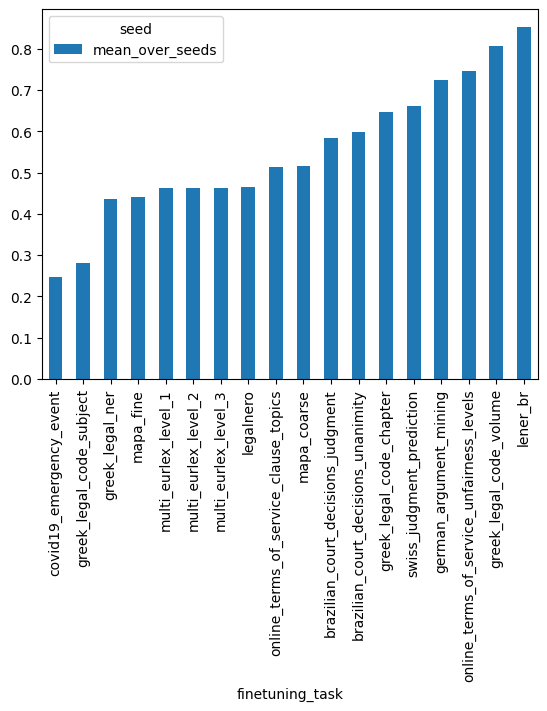

In [8]:
ra.macro_f1_overview[['finetuning_task', 'mean_over_seeds']].groupby('finetuning_task').mean().sort_values('mean_over_seeds').plot.bar()


<AxesSubplot: xlabel='finetuning_task'>

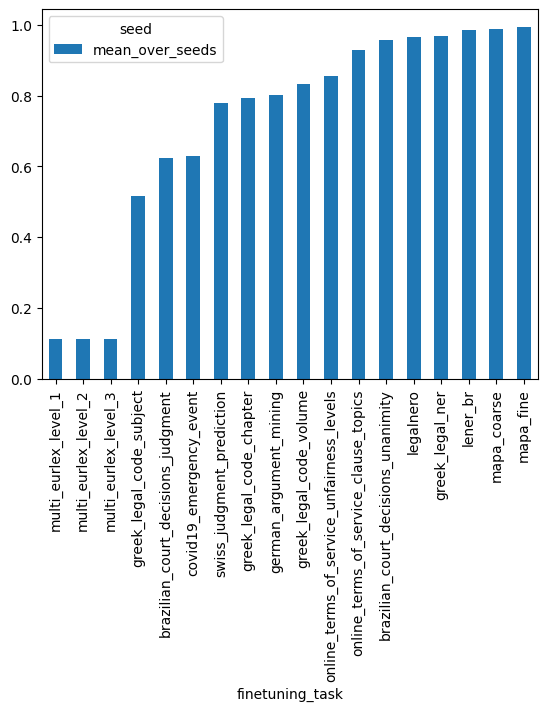

In [9]:
ra.accuracy_normalized_overview[['finetuning_task', 'mean_over_seeds']].groupby('finetuning_task').mean().sort_values('mean_over_seeds').plot.bar()

### 2.4. Aggregated scores

### 2.4.1. Language aggregate

`DEFINITION`: *"1. Average over configurations (e.g. judgment and unanimity) inside datasets, 2. Average over datasets, 3. Average over languages"*

- The aggregated score along languages (the language aggregate score) can be generated with the method `get_language_aggregated_score()`
  - Since, the default score is `macro-f1`, the aggregate score is based on macro-f1. You can change this by defining another score when initializing the object (see description above).
- The result dataframe is stored in the variable `language_aggregated_score`
- When calling the method, the resulting dataframe is saved to a csv and xlsx file, called `language_aggregated_scores` in the results folder

In [10]:
ra.get_language_aggregated_score()
ra.language_aggregated_score.head()

,aggregated_score,bg,cs,da,de,el,en,es,et,fi,...,lv,mt,nb,nl,pl,pt,ro,sk,sl,sv
Model,,,,,,,,,,,,,,,,,,,,,
distilbert-base-multilingual-cased,0.564803,0.652619,0.601685,0.573936,0.641496,0.530584,0.540334,0.669305,0.573807,0.55731,...,0.576674,0.573175,,0.420139,0.435567,0.647029,0.574035,0.589665,0.633116,0.592318
microsoft/Multilingual-MiniLM-L12-H384,0.541192,0.639865,0.576927,0.55422,0.600595,0.489163,0.427805,0.637764,0.59682,0.566289,...,0.602251,0.557416,,0.387676,0.334947,0.635294,0.583967,0.588523,0.62206,0.593779
microsoft/mdeberta-v3-base,0.597839,0.618849,0.60613,0.593104,0.666107,0.540498,0.589462,0.668967,0.603217,0.610791,...,0.613911,0.611897,,0.481132,0.501532,0.678804,0.607964,0.651992,0.65156,0.654207
xlm-roberta-base,0.589215,0.683333,0.613141,0.585065,0.659744,0.546592,0.586028,0.637746,0.593373,0.57539,...,0.608399,0.580081,,0.449799,0.519871,0.682332,0.591517,0.603347,0.662189,0.617128
xlm-roberta-large,0.613107,0.645298,0.632622,0.65105,0.682814,0.595645,0.619074,0.700444,0.613101,0.608994,...,0.655476,0.601188,,0.438974,0.55036,0.680657,0.601825,0.627907,0.681906,0.624922


## - You can restrict the list of tasks you want to consider by passing a list of task names 

In [11]:
ra.get_language_aggregated_score(task_constraint=['german_argument_mining'])
ra.language_aggregated_score.head(50)

,aggregated_score,bg,cs,da,de,el,en,es,et,fi,...,lv,mt,nb,nl,pl,pt,ro,sk,sl,sv
Model,,,,,,,,,,,,,,,,,,,,,
distilbert-base-multilingual-cased,0.694894,,,,0.694894,,,,,,...,,,,,,,,,,
microsoft/Multilingual-MiniLM-L12-H384,0.733315,,,,0.733315,,,,,,...,,,,,,,,,,
microsoft/mdeberta-v3-base,0.7089,,,,0.7089,,,,,,...,,,,,,,,,,
xlm-roberta-base,0.719958,,,,0.719958,,,,,,...,,,,,,,,,,
xlm-roberta-large,0.730889,,,,0.730889,,,,,,...,,,,,,,,,,
iarfmoose/roberta-base-bulgarian,,,,,,,,,,,...,,,,,,,,,,
UWB-AIR/Czert-B-base-cased,,,,,,,,,,,...,,,,,,,,,,
Maltehb/danish-bert-botxo,,,,,,,,,,,...,,,,,,,,,,
dbmdz/bert-base-german-cased,0.726351,,,,0.726351,,,,,,...,,,,,,,,,,


### 2.4.2. Config aggregate

- The aggregated score along configs (the task config score) can be generated with the method `get_config_aggregated_score()`
  - Since, the default score is `macro-f1`, the aggregate score is based on macro-f1. You can change this by defining another score when initializing the object (see description above).
  - Per default the method calcualtes the average over config, dataset, language. To overwrite this behavious, i.e. to calculate the avergae score not over languages, you can set average_over_language=False. The resulting values should be similar to the aggregate scores we find on wandb
- The result dataframe is stored in the variable `config_aggregated_score`
- When calling the method, the resulting dataframe is saved to a csv and xlsx file
  - Depending on whether you average over language or not the name of the file is called `config_aggregated_scores_simple` (not averaged over language) OR `config_aggregated_scores_average_over_language` (averaged over language) in the results folder
  
**The dataset aggregate score is built on top of the results of the config aggregate score**

In [12]:
ra.get_config_aggregated_score()
ra.config_aggregated_score.head()

,aggregated_score,brazilian_court_decisions_judgment,brazilian_court_decisions_unanimity,covid19_emergency_event,german_argument_mining,greek_legal_code_chapter,greek_legal_code_subject,greek_legal_code_volume,greek_legal_ner,legalnero,lener_br,mapa_coarse,mapa_fine,multi_eurlex_level_1,multi_eurlex_level_2,multi_eurlex_level_3,online_terms_of_service_clause_topics,online_terms_of_service_unfairness_levels,swiss_judgment_prediction
Model,,,,,,,,,,,,,,,,,,,
distilbert-base-multilingual-cased,0.575193,0.502525,0.588022,0.233339,0.694894,0.700081,0.332286,0.852435,0.381336,0.484189,0.787091,0.600286,0.499297,0.636105,0.636105,0.636105,0.456731,0.664946,0.667709
microsoft/Multilingual-MiniLM-L12-H384,0.519215,0.493589,0.567157,0.026899,0.733315,0.394065,0.051761,0.817418,0.405478,0.467727,0.859753,0.610968,0.498995,0.619931,0.619931,0.619931,0.138655,0.743416,0.676875
microsoft/mdeberta-v3-base,0.590473,0.657961,0.493377,0.258345,0.7089,0.586163,0.123597,0.855533,0.422202,0.466265,0.877949,0.632546,0.572395,0.650556,0.650556,0.650556,0.53548,0.794867,0.69127
xlm-roberta-base,0.606368,0.654187,0.615876,0.271241,0.719958,0.692794,0.153901,0.858752,0.470398,0.477205,0.860086,0.603181,0.519085,0.656205,0.656218,0.656218,0.550803,0.805106,0.693404
xlm-roberta-large,0.620768,0.550644,0.623047,0.288537,0.730889,0.747135,0.391375,0.58339,0.480222,0.495325,0.881713,0.638615,0.530705,0.680765,0.680765,0.680765,0.669166,0.83077,0.689995


### 2.4.3. Dataset aggregate
`DEFINITION`: *"1. Average over languages inside configurations, 2. Average over configurations (e.g. judgment and unanimity) inside datasets, 3. Average over Datasets"*

- The aggregated score along datasets (the dataset aggregate score) can be generated with the method `get_dataset_aggregated_score()`
  - Since, the default score is `macro-f1`, the aggregate score is based on macro-f1. You can change this by defining another score when initializing the object (see description above).
  - Per default the method calcualtes the average over config, dataset, language. To overwrite this behavious, i.e. to calculate the avergae score not over languages, you can set average_over_language=False. The resulting values should be similar to the aggregate scores we find on wandb
- The result dataframe is stored in the variable `dataset_aggregated_score`
- When calling the method, the resulting dataframe is saved to a csv and xlsx file
  - Depending on whether you average over language or not the name of the file is called `dataset_aggregated_scores_simple` (not averaged over language) OR `dataset_aggregated_scores_average_over_language` (averaged over language) in the results folder

In [13]:
ra.get_dataset_aggregated_score()
ra.dataset_aggregated_score.head()

,aggregated_score,BCD,C19,GAM,GLC,GLN,LNR,LNB,MAP,MEU,OTS,SJP
Model,,,,,,,,,,,,
distilbert-base-multilingual-cased,0.560803,0.545273,0.233339,0.694894,0.628267,0.381336,0.484189,0.787091,0.549792,0.636105,0.560838,0.667709
microsoft/Multilingual-MiniLM-L12-H384,0.521586,0.530373,0.026899,0.733315,0.421082,0.405478,0.467727,0.859753,0.554981,0.619931,0.441035,0.676875
microsoft/mdeberta-v3-base,0.585506,0.575669,0.258345,0.7089,0.521764,0.422202,0.466265,0.877949,0.60247,0.650556,0.665174,0.69127
xlm-roberta-base,0.599192,0.635032,0.271241,0.719958,0.568482,0.470398,0.477205,0.860086,0.561133,0.656213,0.677955,0.693404
xlm-roberta-large,0.61299,0.586846,0.288537,0.730889,0.573967,0.480222,0.495325,0.881713,0.58466,0.680765,0.749968,0.689995


In [14]:
ra.get_dataset_aggregated_score(average_over_language=False)
ra.dataset_aggregated_score.head()

,aggregated_score,BCD,C19,GAM,GLC,GLN,LNR,LNB,MAP,MEU,OTS,SJP
Model,,,,,,,,,,,,
distilbert-base-multilingual-cased,0.572289,0.545273,0.394509,0.694894,0.628267,0.381336,0.484189,0.787091,0.509642,0.636341,0.566683,0.666957
microsoft/Multilingual-MiniLM-L12-H384,0.521005,0.530373,0.055641,0.733315,0.421082,0.405478,0.467727,0.859753,0.517385,0.620181,0.443703,0.676421
microsoft/mdeberta-v3-base,0.595091,0.575669,0.407302,0.7089,0.521764,0.422202,0.466265,0.877949,0.557942,0.650439,0.667429,0.690137
xlm-roberta-base,0.611912,0.635032,0.459025,0.719958,0.568482,0.470398,0.477205,0.860086,0.518195,0.656238,0.683819,0.682596
xlm-roberta-large,0.632946,0.586846,0.541721,0.730889,0.573967,0.480222,0.495325,0.881713,0.555923,0.680804,0.752457,0.682537


## 3. Additional features

### 3.1. Task constraint
- We want to calculate a task aggregate score
- It might be useful, to remove some tasks from the calculations
- This can be done by passing a list of tasks we want to consider; see the example below

In [15]:
print('Results for all available tasks:')
print('------------------------')
ra.get_language_aggregated_score()
ra.get_dataset_aggregated_score(average_over_language=True)

lm = ["distilbert-base-multilingual-cased", "microsoft/Multilingual-MiniLM-L12-H384", "xlm-roberta-base", "microsoft/mdeberta-v3-base", "xlm-roberta-large"]

for x in lm:
    print(x)
    print('\t','language aggregated: ',ra.language_aggregated_score.at[x,'aggregated_score'])
    print('\t','dataset aggregated: ', ra.dataset_aggregated_score.at[x,'aggregated_score'])
    print('-----------------------------------')

print('\n##########################\n')

tasks_we_are_interested_in = ['mapa_fine', 'german_argument_mining']
print('Results for only selected tasks:', ', '.join(tasks_we_are_interested_in))
print('------------------------')
ra.get_language_aggregated_score(task_constraint=tasks_we_are_interested_in)
ra.get_dataset_aggregated_score(average_over_language=True, task_constraint=tasks_we_are_interested_in)

lm = ["distilbert-base-multilingual-cased", "microsoft/Multilingual-MiniLM-L12-H384", "xlm-roberta-base", "microsoft/mdeberta-v3-base", "xlm-roberta-large"]

for x in lm:
    print(x)
    print('\t','language aggregated: ',ra.language_aggregated_score.at[x,'aggregated_score'])
    print('\t','dataset aggregated: ', ra.dataset_aggregated_score.at[x,'aggregated_score'])
    print('-----------------------------------')

print('\n##########################\n')

ra.reset_list_of_available_languages()


Results for all available tasks:
------------------------
distilbert-base-multilingual-cased
	 language aggregated:  0.5648027957353601
	 dataset aggregated:  0.5608030414090036
-----------------------------------
microsoft/Multilingual-MiniLM-L12-H384
	 language aggregated:  0.5411922138902414
	 dataset aggregated:  0.5215863327639679
-----------------------------------
xlm-roberta-base
	 language aggregated:  0.5892154819840193
	 dataset aggregated:  0.5991915386525963
-----------------------------------
microsoft/mdeberta-v3-base
	 language aggregated:  0.5978385894835646
	 dataset aggregated:  0.5855058322160444
-----------------------------------
xlm-roberta-large
	 language aggregated:  0.61310719387216
	 dataset aggregated:  0.6129896644446681
-----------------------------------

##########################

Results for only selected tasks: mapa_fine, german_argument_mining
------------------------
distilbert-base-multilingual-cased
	 language aggregated:  0.503286595389442
	 dat

### 3.2. Language constraint
- We want to calculate a language aggregate score
- It might be useful, to remove some languages from the calculations
- This can be done with the method `remove_languages({LANGUAGE_ID})`
- You can reset the initial number of languages with the method `reset_list_of_available_languages()`
- This might be useful, if you want to gauge the influence of certain languages on the overall scores (see example below)

In [16]:
ra.reset_list_of_available_languages()

print('Results with all available languages:')
print('------------------------')
ra.get_language_aggregated_score()
ra.get_dataset_aggregated_score(average_over_language=True)

lm = ["distilbert-base-multilingual-cased", "microsoft/Multilingual-MiniLM-L12-H384", "xlm-roberta-base", "microsoft/mdeberta-v3-base", "xlm-roberta-large"]

for x in lm:
    print(x)
    print('\t','language aggregated: ',ra.language_aggregated_score.at[x,'aggregated_score'])
    print('\t','dataset aggregated: ', ra.dataset_aggregated_score.at[x,'aggregated_score'])
    print('-----------------------------------')

print('\n##########################\n')

ra.reset_list_of_available_languages()

ra.remove_languages('pt')

print('Results without Portuguese:')
print('------------------------')
ra.get_language_aggregated_score()
ra.get_dataset_aggregated_score(average_over_language=True)

lm = ["distilbert-base-multilingual-cased", "microsoft/Multilingual-MiniLM-L12-H384", "xlm-roberta-base", "microsoft/mdeberta-v3-base", "xlm-roberta-large"]

for x in lm:
    print(x)
    print('\t','language aggregated: ',ra.language_aggregated_score.at[x,'aggregated_score'])
    print('\t','dataset aggregated: ', ra.dataset_aggregated_score.at[x,'aggregated_score'])
    print('-----------------------------------')

print('\n##########################\n')

ra.reset_list_of_available_languages()


Results with all available languages:
------------------------
distilbert-base-multilingual-cased
	 language aggregated:  0.5483917250869867
	 dataset aggregated:  0.5597794957439247
-----------------------------------
microsoft/Multilingual-MiniLM-L12-H384
	 language aggregated:  0.520377858667965
	 dataset aggregated:  0.5215075590958912
-----------------------------------
xlm-roberta-base
	 language aggregated:  0.5744801960379918
	 dataset aggregated:  0.5985368971877005
-----------------------------------
microsoft/mdeberta-v3-base
	 language aggregated:  0.5832080961872723
	 dataset aggregated:  0.5851646850949304
-----------------------------------
xlm-roberta-large
	 language aggregated:  0.6003996449340124
	 dataset aggregated:  0.6130790280533014
-----------------------------------

##########################

Results without Portuguese:
------------------------
distilbert-base-multilingual-cased
	 language aggregated:  0.544281825512342
	 dataset aggregated:  0.5594705742618

## 4. Analysis

### 4.1. Prepare tables for LaTeX

- In order for this to work, you need to make the following imports in your LaTeX document

```
\usepackage{rotating}
\usepackage{adjustbox}
```

### 4.2. Define functions and variables that we will need

In [17]:
# List of mono- and multilingual models
multilingual_models = [lm for lm, lang in ra.meta_infos['model_language_lookup_table'].items() if lang == "all"]
monolingual_models = [lm for lm, lang in ra.meta_infos['model_language_lookup_table'].items() if lang != "all"]

order_of_tasks_as_abbreviations = ["BCD-J", "BCD-U", "GAM", "GLC-V", "GLC-C", "GLC-S", "SJP", "OTS-UL", "OTS-CT", "C19", "MEU-1", "MEU-2", "MEU-3", "GLN", "LNR", "LNB", "MAP-C", "MAP-F"]
order_of_datasets_as_abbreviations = ["BCD","GAM","GLC","SJP", "OTS", "C19", "MEU", "GLN", "LNR", "LNB", "MAP"]
order_of_multilingual_models = ["microsoft/Multilingual-MiniLM-L12-H384", "distilbert-base-multilingual-cased", "microsoft/mdeberta-v3-base", "xlm-roberta-base","xlm-roberta-large"]

In [18]:
# We need to remove "nb"

ra.remove_languages("nb")

In [40]:
# We round all scores (macro-F1 values)

def rename_multilingual_models(model_name):
    if model_name=='distilbert-base-multilingual-cased':
        return 'DistilBERT'
    if model_name=='microsoft/Multilingual-MiniLM-L12-H384':
        return 'MiniLM'
    if model_name=='microsoft/mdeberta-v3-base':
        return 'mDeBERTa v3'
    if model_name=='xlm-roberta-base':
        return 'XLM-R base'
    if model_name=='xlm-roberta-large':
        return 'XLM-R large'
    else:
        return model_name
    
def make_latex_bold(name):
    
    return "\textbf{"+name +"}"

def make_columns_latex_bold(df):
    
    df_copy = deepcopy(df)
    
    for c in df.columns:
        df_copy = df_copy.rename(columns={c:make_latex_bold(c)})
    
    return df_copy
        
        
def round_scores(score):
    if type(score)==float:
        return float(round(score*100,1))
    else:
        return score
    
def insert_standard_deviation(overview_of_results_per_seed, _name_or_path, column_name, query):
    
    for r in overview_of_results_per_seed.to_dict(orient="records"):
        
        if r[column_name]==query and r['_name_or_path']==_name_or_path:
            return r['standard_deviation']
        
def get_mean_of_row_values(row_values):
    #row_values = predict_macro_f1_average.loc['iarfmoose/roberta-base-bulgarian'].tolist()
    
    row_values = [x for x in row_values if type(x) in [float, int]]
    
    mean_value = mean(row_values)
    
    mean_value = round(mean_value,1)
    
    return mean_value


def insert_mean_values(df, column_name_for_mean_value):
    
    result_dict = dict()
    for i, _ in df.iterrows():
        row_values = df.loc[i].tolist()
        row_values_mean = get_mean_of_row_values(row_values)
        result_dict[i]=row_values_mean
        
    for i, _ in df.iterrows():
        df.at[i,column_name_for_mean_value]=result_dict[i]
    
    return df
    
    
    


def try_literal_eval(value):
    try:
        return literal_eval(value)
    except:
        return value

def replace_empty_string_with_zero(value):
    
    if value=="":
        return np.NAN
    else:
        return value

def highlight_max_values_in_colums(df):
    
    df_copy = deepcopy(df)
    df_copy = df_copy.applymap(replace_empty_string_with_zero)
    
    columns = df.columns.tolist()
    
    for col in columns:
        
        if len([v for v in df_copy[col] if type(try_literal_eval(v)) in [int, float]])>0:
            try:
                max_value = df_copy[col].max()
                new_values = [v if v!=max_value else '\\bf '+str(v) for v in df_copy[col]]
                df_copy[col]=new_values
            except Exception as e:
                print(e)
                print(df_copy[col])
    
    df_copy.fillna('', inplace=True)
    
    return df_copy


def replace_empty_with_minus(value):
    if value=="":
        return "-"
    else:
        return value


def create_latex_horizontal_table(df, caption="", label="", index=False, insert_minus=True):
    
    #Make column names bold
    if insert_minus==True:
        df = df.applymap(replace_empty_with_minus)
    
    columns = df.columns.tolist()
    for c in columns:
        c_new = "\textbf{"+c+r"}"
        df = df.rename(columns={c:c_new})
    
    pre_formatting = ""
    pre_formatting = pre_formatting + "\\begin{table*}[t]\n"
    pre_formatting = pre_formatting + "\\centering\n"
    pre_formatting = pre_formatting + "\\resizebox{\\textwidth}{!}{\n"
    
    after_formatting = ""
    after_formatting = after_formatting + "}\n"
    after_formatting = after_formatting + "\caption{"+caption+"}\n"
    after_formatting = after_formatting + "\label{"+label+"}\n"
    after_formatting = after_formatting + "\end{table*}"
    
    with pd.option_context("max_colwidth", 1000):
        df_latex = df.to_latex(index=index, escape=False)
    
    return pre_formatting + df_latex + after_formatting
    

def check_model_type(model_name, only_type=False):
    
    '''Checks if model is general or legal.'''
    for model_type, info in ra.meta_infos['language_models'].items():
        for language, size_infos in info.items():
            for size, model_list in size_infos.items():
                for model in model_list:
                    if model == model_name:
                        if only_type:
                            return model_type
                        else:
                            if model in multilingual_models:
                                return "multiling. " + model_type
                            else:
                                return "monoling. " + model_type

    
    
def create_latex_sideways_table(df, caption="", label="", index=True, insert_minus=True):
    
    
    #Make column names bold
    
    if insert_minus==True:
        df = df.applymap(replace_empty_with_minus)
    
    columns = df.columns.tolist()
    for c in columns:
        df = df.rename(columns={c : "\textbf{"+c+r"}"})
        
    pre_formatting = ""
    pre_formatting = pre_formatting + "\\begin{sidewaystable}\n"
    pre_formatting = pre_formatting + "\\begin{adjustbox}{width=1\\textwidth}\n"
    pre_formatting = pre_formatting + "\medium\n"



    after_formatting = ""
    after_formatting = after_formatting + "\end{adjustbox}\n"
    after_formatting = after_formatting + "\caption{"+caption+"}\n"
    after_formatting = after_formatting + "\label{"+label+"}\n"
    after_formatting = after_formatting + "\end{sidewaystable}\n"



    with pd.option_context("max_colwidth", 1000):
        df_latex = df.to_latex(index=index, escape=False)
    
    return pre_formatting + df_latex + after_formatting
    
def combine_latex_sideways_tables(table_1, table_2, distance="1cm"):
    table_1 = '\n'.join(table_1.split('\n')[1:-2])
    table_2 = '\n'.join(table_2.split('\n')[1:-2])
    
    pre_formatting = "\\begin{sidewaystable}\n"
    after_formatting = "\\end{sidewaystable}\n"
    
    return pre_formatting + table_1 +"\\vspace{"+distance+"}"+table_2 + after_formatting
    

def create_average_aggregates(target, score, language_types=None, highlight_max_values=True):
    
    multilingual_models = [lm for lm, lang in ra.meta_infos['model_language_lookup_table'].items() if lang == "all"]
    monolingual_models = [lm for lm, lang in ra.meta_infos['model_language_lookup_table'].items() if lang != "all"]
    
    '''
    Gegenartes scores based on normal average for predcit and eval values.
    Gets average over all seeds per task.
    Gets avergage over targets.
    The target is either the dataset or the language.
    
    Parameters
    ----------
    target : The value you want to create the aggregate score with. It canbe either 'language' or 'dataset'.
    score : Define which score you want to use. If you choose 'macro-f1', it will be converted to 'predict/_macro_f1'. If you want to use the values from the eval dataset, use the prefix 'eval_', i.e. 'eval/macro-f1'. 
    '''
    
    macro_f1_first = ra.create_overview_of_results_per_seed(score=score,only_completed_tasks=False)
    macro_f1 = macro_f1_first[["_name_or_path", target, "mean_over_seeds"]]
    macro_f1 = macro_f1.sort_values(target)
    df_aggregated = pd.pivot_table(macro_f1,index="_name_or_path", columns=target, values="mean_over_seeds", aggfunc=np.mean)
    
    if language_types == 'multi':
        df_aggregated = df_aggregated.loc[multilingual_models]
    elif language_types == 'mono':
        df_aggregated = df_aggregated.loc[monolingual_models]
            

    
    df_aggregated.columns.name=""
    df_aggregated.index.rename("Model", inplace=True)
    df_aggregated.dropna(axis=1, how='all', inplace=True)
    df_aggregated.fillna('', inplace=True)
    
    if target=="language":
        df_aggregated = df_aggregated.rename(columns={'all':'multilingual'})
    
    df_aggregated = df_aggregated.applymap(round_scores)
    df_aggregated.fillna("", inplace=True)
    first_column = 'Mean' #over '+re.sub('_',' ',target)+'s'
    #df_aggregated[first_column] = df_aggregated.mean(axis=1, numeric_only=True) # Does not work
    
    # Insert mean values
    df_aggregated = insert_mean_values(df_aggregated, first_column)
        


    columns = df_aggregated.columns.tolist()
    df_aggregated = df_aggregated.applymap(lambda x: str(x))
    df_aggregated = df_aggregated[[first_column] + [col for col in columns if col not in first_column]]
    
    if highlight_max_values:
        df_aggregated = highlight_max_values_in_colums(df_aggregated)
    
    # Insert standard deviation
    for t in macro_f1_first[target].unique():
        for _name_or_path in df_aggregated.index.tolist():
            standard_deviation = insert_standard_deviation(macro_f1_first, _name_or_path, target, t)
            if df_aggregated.at[_name_or_path, t]:
                df_aggregated.at[_name_or_path, t] = df_aggregated.at[_name_or_path, t] + ' (±'+str(round_scores(standard_deviation))+') '  
    
    
    # Insert abbreviations
    if target == "finetuning_task":
        for finetuning_task, abbreviation in ra.meta_infos["task_abbreviations"].items():
            df_aggregated.rename(columns={finetuning_task: abbreviation}, inplace=True)
            
    rest_columns = [c for c in df_aggregated.columns if c not in order_of_tasks_as_abbreviations]
    df_aggregated = df_aggregated[rest_columns + order_of_tasks_as_abbreviations]
    
    for x in ['MEU-2', 'MEU-3']:
        if x in df_aggregated.columns.tolist():
            del df_aggregated[x]
    
    df_aggregated = make_columns_latex_bold(df_aggregated)
    if language_types=="multi":
        df_aggregated = df_aggregated.reindex(index = order_of_multilingual_models)
    df_aggregated.index = df_aggregated.index.map(rename_multilingual_models)        
    
    return df_aggregated

    

### 4.3.  Compare eval and prediction mean of macro-F1

### 4.3.1. Create Averages over finetuning tasks
#### 4.3.1.1. Multilingual models


In [41]:
language_types = 'multi'
# predict macro-f1
predict_macro_f1_average = create_average_aggregates(target='finetuning_task',score='macro-f1', language_types=language_types)

# eval macro-f1
eval_macro_f1_average = create_average_aggregates(target='finetuning_task',score='eval/macro-f1', language_types=language_types)

combined_macro_f1_average = deepcopy(eval_macro_f1_average)


# This is not needed anymore
'''for i, _ in combined_macro_f1_average.iterrows():
    for c in combined_macro_f1_average.columns.tolist():
        eval_score = eval_macro_f1_average.at[i, c]
        predict_score = predict_macro_f1_average.at[i, c]
        combined_macro_f1_average.at[i, c]=str(eval_score)+' / '+str(predict_score)'''
        

predict_macro_f1_average_latext = create_latex_sideways_table(predict_macro_f1_average, caption="Macro-F1 and standard deviation for multilingual models from the test set. The best scores are in bold.")
eval_macro_f1_average_latex = create_latex_sideways_table(eval_macro_f1_average, caption="Macro-F1 and standard deviation for multilingual models from the validation set. The best scores are in bold.")
x = combine_latex_sideways_tables(eval_macro_f1_average_latex, predict_macro_f1_average_latext)
print(x)

\begin{sidewaystable}
\begin{adjustbox}{width=1\textwidth}
\medium
\begin{tabular}{llllllllllllllllll}
\toprule
{} & \textbf{\textbf{Mean}} & \textbf{\textbf{BCD-J}} & \textbf{\textbf{BCD-U}} & \textbf{\textbf{GAM}} & \textbf{\textbf{GLC-V}} & \textbf{\textbf{GLC-C}} & \textbf{\textbf{GLC-S}} & \textbf{\textbf{SJP}} & \textbf{\textbf{OTS-UL}} & \textbf{\textbf{OTS-CT}} & \textbf{\textbf{C19}} & \textbf{\textbf{MEU-1}} & \textbf{\textbf{GLN}} & \textbf{\textbf{LNR}} & \textbf{\textbf{LNB}} & \textbf{\textbf{MAP-C}} & \textbf{\textbf{MAP-F}} \\
Model       &                        &                         &                         &                       &                         &                         &                         &                       &                          &                          &                       &                         &                       &                       &                       &                         &                         \\
\midr

/var/folders/w1/wqc21nmn2556z5pqs1_g_5000000gn/T/ipykernel_43955/1866189989.py:190: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_latex = df.to_latex(index=index, escape=False)
/var/folders/w1/wqc21nmn2556z5pqs1_g_5000000gn/T/ipykernel_43955/1866189989.py:190: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_latex = df.to_latex(index=index, escape=False)


#### 4.3.1.2. Monolingual models

In [42]:
language_types = 'mono'
# predict macro-f1
predict_macro_f1_average = create_average_aggregates(target='finetuning_task',score='macro-f1', language_types=language_types, highlight_max_values=False)

# eval macro-f1
eval_macro_f1_average = create_average_aggregates(target='finetuning_task',score='eval/macro-f1', language_types=language_types, highlight_max_values=False)

combined_macro_f1_average = deepcopy(eval_macro_f1_average)

        

predict_macro_f1_average_latext = create_latex_sideways_table(predict_macro_f1_average, caption="Macro-F1 and standard deviation for monolingual models from the test set. The best scores are in bold.")
eval_macro_f1_average_latex = create_latex_sideways_table(eval_macro_f1_average, caption="Macro-F1 and standard deviation for monolingual models from the validation set. The best scores are in bold.")
x = combine_latex_sideways_tables(eval_macro_f1_average_latex, predict_macro_f1_average_latext)
print(predict_macro_f1_average_latext)
print(eval_macro_f1_average_latex)

\begin{sidewaystable}
\begin{adjustbox}{width=1\textwidth}
\medium
\begin{tabular}{llllllllllllllllll}
\toprule
{} & \textbf{\textbf{Mean}} & \textbf{\textbf{BCD-J}} & \textbf{\textbf{BCD-U}} & \textbf{\textbf{GAM}} & \textbf{\textbf{GLC-V}} & \textbf{\textbf{GLC-C}} & \textbf{\textbf{GLC-S}} & \textbf{\textbf{SJP}} & \textbf{\textbf{OTS-UL}} & \textbf{\textbf{OTS-CT}} & \textbf{\textbf{C19}} & \textbf{\textbf{MEU-1}} & \textbf{\textbf{GLN}} & \textbf{\textbf{LNR}} & \textbf{\textbf{LNB}} & \textbf{\textbf{MAP-C}} & \textbf{\textbf{MAP-F}} \\
Model                                          &                        &                         &                         &                       &                         &                         &                         &                       &                          &                          &                       &                         &                       &                       &                       &                        

/var/folders/w1/wqc21nmn2556z5pqs1_g_5000000gn/T/ipykernel_43955/1866189989.py:190: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_latex = df.to_latex(index=index, escape=False)
/var/folders/w1/wqc21nmn2556z5pqs1_g_5000000gn/T/ipykernel_43955/1866189989.py:190: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_latex = df.to_latex(index=index, escape=False)


### 4.4. Create language and dataset aggregate scores 
#### 4.4.1. First only multilingual models

In [28]:
def find_highes_score(language, which):
    ra.get_language_aggregated_score()
    las = ra.language_aggregated_score
    las = las.applymap(round_scores)
    las = las.reset_index()
    las['Type'] = las.Model.apply(lambda x: check_model_type(x))
    las = las.set_index('Model')
    las_mono_general = las[(las.Type=="monoling. general") ]
    las_mono_legal = las[las.Type=="monoling. legal"]

    if which=="general":
        df_copy = deepcopy(las_mono_general)
    elif which=="legal":
        df_copy = deepcopy(las_mono_legal)
    df_copy = df_copy.replace(r'^\s*$', np.nan, regex=True)
    res = df_copy[language].max()
    return res


ra.get_language_aggregated_score()
language_aggregated_score = ra.language_aggregated_score
language_aggregated_score_multilingual_models = language_aggregated_score.loc[multilingual_models]
language_aggregated_score_multilingual_models = language_aggregated_score_multilingual_models.applymap(round_scores)
language_aggregated_score_multilingual_models = language_aggregated_score_multilingual_models.reindex(index = order_of_multilingual_models)
language_aggregated_score_multilingual_models = language_aggregated_score_multilingual_models.reset_index()
empty_row = pd.DataFrame([{c:'' for c in language_aggregated_score_multilingual_models.columns}])
language_aggregated_score_multilingual_models = pd.concat([language_aggregated_score_multilingual_models, empty_row])
language_aggregated_score_multilingual_models = pd.concat([language_aggregated_score_multilingual_models, empty_row])
language_aggregated_score_multilingual_models.reset_index(inplace=True)
index_for_best_legal_model = language_aggregated_score_multilingual_models.index.tolist()[-2]
index_for_best_general_model = language_aggregated_score_multilingual_models.index.tolist()[-1]
language_aggregated_score_multilingual_models.at[index_for_best_legal_model, 'Model']='NativeLegalBERT'
language_aggregated_score_multilingual_models.at[index_for_best_general_model, 'Model']='NativeBERT'
for c in language_aggregated_score_multilingual_models.columns:
    if len(c)==2:
        for i,_ in language_aggregated_score_multilingual_models.iterrows():
            print(i, c)
            best_legal_model = find_highes_score(c, 'legal')
            best_general_model = find_highes_score(c, 'general')
            print(best_legal_model)
            print(best_general_model)
            language_aggregated_score_multilingual_models.at[index_for_best_legal_model, c]=best_legal_model
            language_aggregated_score_multilingual_models.at[index_for_best_general_model, c]=best_general_model
            del best_general_model
            del best_legal_model
            
del language_aggregated_score_multilingual_models['index']
#language_aggregated_score_multilingual_models_latex = create_latex_horizontal_table(language_aggregated_score_multilingual_models, caption="Language aggregate scores for multilingual models. The best scores are in bold.", label="language_aggregate_multilingual_models")
#print(language_aggregated_score_multilingual_models_latex) #Does not work
col_name_agg = "aggregated_score"
columns_las = [c for c in language_aggregated_score_multilingual_models.columns.tolist() if c != col_name_agg]
language_aggregated_score_multilingual_models = language_aggregated_score_multilingual_models[columns_las+[col_name_agg]]
language_aggregated_score_multilingual_models = language_aggregated_score_multilingual_models.rename(columns={col_name_agg:"Agg."})


ra.get_dataset_aggregated_score()
dataset_aggregated_score = ra.dataset_aggregated_score
rest_columns = [c for c in dataset_aggregated_score.columns if c not in order_of_datasets_as_abbreviations]
dataset_aggregated_score = dataset_aggregated_score[order_of_datasets_as_abbreviations+rest_columns]
dataset_aggregated_score_multilingual_models = dataset_aggregated_score.loc[multilingual_models]
dataset_aggregated_score_multilingual_models = dataset_aggregated_score_multilingual_models.applymap(round_scores)
dataset_aggregated_score_multilingual_models = dataset_aggregated_score_multilingual_models.reindex(index = order_of_multilingual_models)
dataset_aggregated_score_multilingual_models = dataset_aggregated_score_multilingual_models.reset_index()
#dataset_aggregated_score_multilingual_models_latex = create_latex_horizontal_table(dataset_aggregated_score_multilingual_models, caption="Dataset aggregate scores for multilingual models", label="dataset_aggregate_multilingual_models")
#print(dataset_aggregated_score_multilingual_models_latex) #Does not work
col_name_agg = "aggregated_score"
columns_las = [c for c in dataset_aggregated_score_multilingual_models.columns.tolist() if c != col_name_agg]
dataset_aggregated_score_multilingual_models = dataset_aggregated_score_multilingual_models[columns_las+[col_name_agg]]
dataset_aggregated_score_multilingual_models = dataset_aggregated_score_multilingual_models.rename(columns={col_name_agg:"Agg."})




0 bg
nan
38.4
1 bg
nan
38.4
2 bg
nan
38.4
3 bg
nan
38.4
4 bg
nan
38.4
5 bg
nan
38.4
6 bg
nan
38.4
0 cs
nan
54.0
1 cs
nan
54.0
2 cs
nan
54.0
3 cs
nan
54.0
4 cs
nan
54.0
5 cs
nan
54.0
6 cs
nan
54.0
0 da
nan
51.6
1 da
nan
51.6
2 da
nan
51.6
3 da
nan
51.6
4 da
nan
51.6
5 da
nan
51.6
6 da
nan
51.6
0 de
nan
63.7
1 de
nan
63.7
2 de
nan
63.7
3 de
nan
63.7
4 de
nan
63.7
5 de
nan
63.7
6 de
nan
63.7
0 el
nan
56.6
1 el
nan
56.6
2 el
nan
56.6
3 el
nan
56.6
4 el
nan
56.6
5 el
nan
56.6
6 el
nan
56.6
0 en
55.5
52.4
1 en
55.5
52.4
2 en
55.5
52.4
3 en
55.5
52.4
4 en
55.5
52.4
5 en
55.5
52.4
6 en
55.5
52.4
0 es
42.4
47.8
1 es
42.4
47.8
2 es
42.4
47.8
3 es
42.4
47.8
4 es
42.4
47.8
5 es
42.4
47.8
6 es
42.4
47.8
0 et
nan
35.6
1 et
nan
35.6
2 et
nan
35.6
3 et
nan
35.6
4 et
nan
35.6
5 et
nan
35.6
6 et
nan
35.6
0 fi
nan
51.4
1 fi
nan
51.4
2 fi
nan
51.4
3 fi
nan
51.4
4 fi
nan
51.4
5 fi
nan
51.4
6 fi
nan
51.4
0 fr
nan
50.6
1 fr
nan
50.6
2 fr
nan
50.6
3 fr
nan
50.6
4 fr
nan
50.6
5 fr
nan
50.6
6 fr
nan
50.6
0 ga
n

In [29]:
dataset_aggregated_score_multilingual_models = dataset_aggregated_score_multilingual_models.applymap(rename_multilingual_models)
dataset_aggregated_score_multilingual_models = highlight_max_values_in_colums(dataset_aggregated_score_multilingual_models)
dataset_aggregated_score_multilingual_models = make_columns_latex_bold(dataset_aggregated_score_multilingual_models)
print(dataset_aggregated_score_multilingual_models.to_latex(index=False, escape=False))


\begin{tabular}{lllllllllllll}
\toprule
\textbf{Model} & \textbf{BCD} & \textbf{GAM} & \textbf{GLC} & \textbf{SJP} & \textbf{OTS} & \textbf{C19} & \textbf{MEU} & \textbf{GLN} & \textbf{LNR} & \textbf{LNB} & \textbf{MAP} & \textbf{Agg.} \\
\midrule
        MiniLM &         53.0 &     \bf 73.3 &         42.1 &         67.7 &         44.1 &          2.7 &         62.0 &         40.5 &         46.8 &         86.0 &         55.5 &          52.2 \\
    DistilBERT &         54.5 &         69.5 &     \bf 62.8 &         66.8 &         56.1 &         23.3 &         63.6 &         38.1 &         48.4 &         78.7 &         55.0 &          56.1 \\
   mDeBERTa v3 &         57.6 &         70.9 &         52.2 &         69.1 &         66.5 &         25.8 &         65.1 &         42.2 &         46.6 &         87.8 &     \bf 60.2 &          58.6 \\
    XLM-R base &     \bf 63.5 &         72.0 &         56.8 &     \bf 69.3 &         67.8 &         27.1 &         65.6 &         47.0 &         47.7 &    

/var/folders/w1/wqc21nmn2556z5pqs1_g_5000000gn/T/ipykernel_43955/1822745170.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(dataset_aggregated_score_multilingual_models.to_latex(index=False, escape=False))


In [30]:
language_aggregated_score_multilingual_models = language_aggregated_score_multilingual_models.applymap(rename_multilingual_models)
language_aggregated_score_multilingual_models = highlight_max_values_in_colums(language_aggregated_score_multilingual_models)
language_aggregated_score_multilingual_models = make_columns_latex_bold(language_aggregated_score_multilingual_models)
print(language_aggregated_score_multilingual_models.to_latex(index=False, escape=False))

\begin{tabular}{lllllllllllllllllllllllllll}
\toprule
 \textbf{Model} & \textbf{bg} & \textbf{cs} & \textbf{da} & \textbf{de} & \textbf{el} & \textbf{en} & \textbf{es} & \textbf{et} & \textbf{fi} & \textbf{fr} & \textbf{ga} & \textbf{hr} & \textbf{hu} & \textbf{it} & \textbf{lt} & \textbf{lv} & \textbf{mt} & \textbf{nb} & \textbf{nl} & \textbf{pl} & \textbf{pt} & \textbf{ro} & \textbf{sk} & \textbf{sl} & \textbf{sv} & \textbf{Agg.} \\
\midrule
         MiniLM &        64.0 &        57.7 &        55.4 &        60.1 &        48.9 &        42.8 &        63.8 &        59.7 &        56.6 &        48.5 &        41.5 &        62.2 &        41.8 &        45.6 &        59.8 &        60.2 &        55.7 &             &        38.8 &        33.5 &        63.5 &        58.4 &        58.9 &        62.2 &        59.4 &          54.1 \\
     DistilBERT &        65.3 &        60.2 &        57.4 &        64.1 &        53.1 &        54.0 &        66.9 &        57.4 &        55.7 &        55.8 &        45

/var/folders/w1/wqc21nmn2556z5pqs1_g_5000000gn/T/ipykernel_43955/1033670936.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(language_aggregated_score_multilingual_models.to_latex(index=False, escape=False))


- At the end, we want to add rows with the best results for the native generic and legal models


In [31]:
print(language_aggregated_score_multilingual_models.applymap(replace_empty_with_minus).to_latex(index=False, escape=False))



\begin{tabular}{lllllllllllllllllllllllllll}
\toprule
 \textbf{Model} & \textbf{bg} & \textbf{cs} & \textbf{da} & \textbf{de} & \textbf{el} & \textbf{en} & \textbf{es} & \textbf{et} & \textbf{fi} & \textbf{fr} & \textbf{ga} & \textbf{hr} & \textbf{hu} & \textbf{it} & \textbf{lt} & \textbf{lv} & \textbf{mt} & \textbf{nb} & \textbf{nl} & \textbf{pl} & \textbf{pt} & \textbf{ro} & \textbf{sk} & \textbf{sl} & \textbf{sv} & \textbf{Agg.} \\
\midrule
         MiniLM &        64.0 &        57.7 &        55.4 &        60.1 &        48.9 &        42.8 &        63.8 &        59.7 &        56.6 &        48.5 &        41.5 &        62.2 &        41.8 &        45.6 &        59.8 &        60.2 &        55.7 &           - &        38.8 &        33.5 &        63.5 &        58.4 &        58.9 &        62.2 &        59.4 &          54.1 \\
     DistilBERT &        65.3 &        60.2 &        57.4 &        64.1 &        53.1 &        54.0 &        66.9 &        57.4 &        55.7 &        55.8 &        45

/var/folders/w1/wqc21nmn2556z5pqs1_g_5000000gn/T/ipykernel_43955/6242905.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(language_aggregated_score_multilingual_models.applymap(replace_empty_with_minus).to_latex(index=False, escape=False))


In [44]:
language_aggregated_score_multilingual_models.columns.tolist()

['\textbf{Model}',
 '\textbf{bg}',
 '\textbf{cs}',
 '\textbf{da}',
 '\textbf{de}',
 '\textbf{el}',
 '\textbf{en}',
 '\textbf{es}',
 '\textbf{et}',
 '\textbf{fi}',
 '\textbf{fr}',
 '\textbf{ga}',
 '\textbf{hr}',
 '\textbf{hu}',
 '\textbf{it}',
 '\textbf{lt}',
 '\textbf{lv}',
 '\textbf{mt}',
 '\textbf{nb}',
 '\textbf{nl}',
 '\textbf{pl}',
 '\textbf{pt}',
 '\textbf{ro}',
 '\textbf{sk}',
 '\textbf{sl}',
 '\textbf{sv}',
 '\textbf{Agg.}']

### 4.4. Then monolingual models

- For monolingual models, only the aggregate score suffices, because it is the same as the score for their specific language
- Therfore, we get rid of the columns, except of the column `aggregate score`
- But, for each model name we add in brackets information about their specific language


In [ ]:
ra.get_language_aggregated_score()
language_aggregated_score = ra.language_aggregated_score
ra.get_dataset_aggregated_score()
dataset_aggregated_score = ra.dataset_aggregated_score
language_aggregated_score = language_aggregated_score.loc[monolingual_models]
language_aggregated_score = language_aggregated_score[['aggregated_score']]
language_aggregated_score['language'] = language_aggregated_score.index.map(find_language)
language_aggregated_score = language_aggregated_score.applymap(round_scores)
language_aggregated_score = language_aggregated_score[['language', 'aggregated_score']]
language_aggregated_score.rename(columns={'aggregated_score':'language aggregated score'}, inplace=True)


dataset_aggregated_score = ra.dataset_aggregated_score
dataset_aggregated_score = dataset_aggregated_score.loc[monolingual_models]
dataset_aggregated_score = dataset_aggregated_score.applymap(round_scores)
dataset_aggregated_score.rename(columns={'aggregated_score':'dataset aggregated score'}, inplace=True)

combined_scores = language_aggregated_score.join(dataset_aggregated_score, how='outer')
del combined_scores['dataset aggregated score']
combined_scores.rename(columns={'language aggregated score': 'Agg.', 'language':'Language'}, inplace=True)
combined_scores = make_columns_latex_bold(combined_scores)
combined_scores = highlight_max_values_in_colums(combined_scores)

pre_formatting = ""
pre_formatting = pre_formatting + "\\begin{sidewaystable}\n"
#pre_formatting = pre_formatting + "\centering\n"
pre_formatting = pre_formatting + "\\begin{adjustbox}{width=1\\textwidth}\n"
pre_formatting = pre_formatting + "\medium\n"

after_formatting = ""
after_formatting = after_formatting + "\end{adjustbox}\n"
after_formatting = after_formatting + "\caption{Dataset and Language aggregate scores for monolingual models. The best scores are in bold.}\n"
after_formatting = after_formatting + "\label{dataset_language_aggregate_for_monolingual_models}\n"
after_formatting = after_formatting + "\end{sidewaystable}\n"
#pre_formatting = pre_formatting + "\n"

dataset_aggregated_score_for_latex = pre_formatting + combined_scores.to_latex(escape=False) + after_formatting
print(dataset_aggregated_score_for_latex)



- That was not sufficient. We want to compare monolingual models directly with multilingual models
- Therefore, for each language we will create table which will contain
  - The datasets that contain that specific language
  - The language aggregate score from all multilingual model based on the pre-selected datasets
  - The language aggregate score from the monolingual models relevant for the pre-selected language based on the pre-selected datasets

In [ ]:
multilingual_models = [model for model, lang in ra.meta_infos['model_language_lookup_table'].items() if lang=='all']

language_dict = {
        "bg": "Bulgarian",
        "cs": "Czech",
        "da": "Danish",
        "de": "German",
        "el": "Greek",
        "en": "English",
        "es": "Spanish",
        "et": "Estonian",
        "fi": "Finnish",
        "fr": "French",
        "ga": "Irish",
        "hu": "Hungarian",
        "it": "Italian",
        "nl": "Dutch",
        "pl": "Polish",
        "pt": "Portuguese",
        "ro": "Romanian",
        "sk": "Slovak",
        "sv": "Swedish"
    }

relevant_languages = set()


for model, language in ra.meta_infos['model_language_lookup_table'].items():
    if language != 'all':
        relevant_languages.add(language)
        
relevant_languages = sorted(list(relevant_languages))

def get_relevant_monoling_models_for_language(lang):
    relevant_models = list()
    for model, language in ra.meta_infos['model_language_lookup_table'].items():
        if language==lang:
            relevant_models.append(model)
    return relevant_models

def get_relevant_tasks_for_language(lang):
    relevant_tasks = list()
    for task, languages in ra.meta_infos['task_language_mapping'].items():
        for language in languages:
            if language==lang:
                relevant_tasks.append(task)
    return relevant_tasks


sample_model = 'iarfmoose/roberta-base-bulgarian'

                            
                    



#for lang in relevant_languages:
def get_dataset_agg_for_lang(lang):
    relevant_models = get_relevant_monoling_models_for_language(lang)
    relevant_tasks = get_relevant_tasks_for_language(lang)
    ra.get_dataset_aggregated_score(task_constraint=relevant_tasks)
    dataset_aggregated_score = ra.dataset_aggregated_score
    dataset_aggregated_score = dataset_aggregated_score.loc[relevant_models + multilingual_models]
    dataset_aggregated_score = dataset_aggregated_score.replace(r'^\s*$', np.nan, regex=True)
    dataset_aggregated_score = dataset_aggregated_score.applymap(round_scores)
    dataset_aggregated_score.reset_index(inplace=True)
    dataset_aggregated_score['Type']=dataset_aggregated_score.Model.apply(check_model_type)
    dataset_aggregated_score.rename(columns={'aggregated_score':'Agg.'}, inplace=True)
    datasets_abb = set([ra.meta_infos["config_to_dataset"][t] for t in relevant_tasks])
    datasets_abb = [ra.meta_infos['dataset_abbreviations'][t] for t in datasets_abb]
    datasets_abb = [a for a in order_of_datasets_as_abbreviations if a in datasets_abb]
    dataset_aggregated_score = dataset_aggregated_score[['Model', 'Type']+datasets_abb+['Agg.']]
    dataset_aggregated_score = dataset_aggregated_score.dropna(axis=1, how='all')
    remaining_monolingual = [m for m in dataset_aggregated_score.Model.tolist() if m not in order_of_multilingual_models]
    dataset_aggregated_score = dataset_aggregated_score.set_index('Model')
    dataset_aggregated_score = dataset_aggregated_score.loc[order_of_multilingual_models+remaining_monolingual]
    dataset_aggregated_score = dataset_aggregated_score.reset_index()
    dataset_aggregated_score['Model'] = dataset_aggregated_score.Model.apply(rename_multilingual_models)
    #dataset_aggregated_score = dataset_aggregated_score.set_index('Model')
    dataset_aggregated_score = highlight_max_values_in_colums(dataset_aggregated_score)
    return dataset_aggregated_score



In [ ]:
import warnings

warnings.filterwarnings('ignore')

for lang in relevant_languages:
    caption = "Dataset aggregate for all multilingual models and models pretrained on "+language_dict[lang]+" and datasets containing samples in "+language_dict[lang]+". The best scores are in bold."
    label = "dataset_aggregate_for_lang_"+lang
    latext_table = create_latex_horizontal_table(get_dataset_agg_for_lang(lang), index=False, caption=caption, label=label)
    print(latext_table)
    print('\n\n\n')

## 5. Overview of splits


In [ ]:
# Prepare everything

def get_list_of_languages(dataset_name, df):
    list_of_languages = sorted(list(df[df.Dataset==dataset_name].Language.unique()))
    list_of_languages = [l for l in list_of_languages if l!="all"]
    return ', '.join(list_of_languages)

monolingual_tasks = set()
multilingual_tasks = set()

for task, list_of_langs in ra.meta_infos['task_language_mapping'].items():
    if len(list_of_langs)>1:
        multilingual_tasks.add(task)
    else:
        monolingual_tasks.add(task)
        

def check_if_basic_configuration(finetuning_task, language):
    
    if finetuning_task in multilingual_tasks and language=='all':
        return True
    elif finetuning_task in monolingual_tasks:
        return True
    else:
        return False
    



sizes = pd.read_excel("Results from the Literature.xlsx", sheet_name="Sizes")

sizes['for_basic_overview'] = sizes.apply(lambda x: check_if_basic_configuration(x['finetuning_task'], x['language']), axis=1)


sizes['number_of_examples'] = sizes['number_of_examples'].apply(int)
sizes['number_of_labels'] = sizes['number_of_labels'].apply(int)

# Add dataset for each finetuning task
sizes['Dataset'] = sizes.finetuning_task.apply(lambda x: ra.meta_infos["config_to_dataset"][x])
sizes["Jurisdiction"]=sizes.Dataset.apply(lambda x: ", ".join(ra.meta_infos["dataset_jurisdiction"][x]))

sizes['finetuning_task'] = sizes['finetuning_task'].apply(lambda x: ra.meta_infos['task_abbreviations'][x])

sizes['Dataset'] = sizes['Dataset'].apply(lambda x: ra.meta_infos['dataset_abbreviations'][x])

sizes = sizes.rename(columns={"finetuning_task": "Task", "split":"Split","number_of_examples": "Num. of ex.","number_of_labels": "Num. of labels", "language": "Language"})
sizes = sizes[["Dataset", "Task", "Split", "Language", "Num. of ex.","Num. of labels", "for_basic_overview", "Jurisdiction"]]
sizes.head()


### 5.1. Create table for the paper with the basics


- Now, we will create an overview or the number of samples per split, number of labels per split

In [ ]:
def get_sizes(df, finetuning_task, split, target):
    
    return df[(df["Split"]==split) & (df["Task"]==finetuning_task)][target].tolist()[0]

def insert_split_specific_num_ex(df, task, target):
    
    num_ex_train = get_sizes(df=df, split="train", target=target, finetuning_task=task)
    num_ex_eval = get_sizes(df=df, split="validation", target=target, finetuning_task=task)
    num_ex_test = get_sizes(df=df, split="test", target=target, finetuning_task=task)
    
    result = [str(num_ex_train),str(num_ex_eval),str(num_ex_test)]
    return " / ".join(result)  



subset_for_basic_overview = sizes[sizes["for_basic_overview"]==True]
look_up = deepcopy(subset_for_basic_overview)

subset_for_basic_overview["Languages"] = subset_for_basic_overview.Dataset.apply(lambda x: get_list_of_languages(x, sizes))
subset_for_basic_overview["Num. of labels"] = subset_for_basic_overview.Task.apply(lambda x: insert_split_specific_num_ex(look_up, x, "Num. of labels"))
subset_for_basic_overview["Num. of ex."] = subset_for_basic_overview.Task.apply(lambda x: insert_split_specific_num_ex(look_up, x, "Num. of ex."))
subset_for_basic_overview = subset_for_basic_overview[["Dataset","Task","Num. of ex.","Num. of labels","Jurisdiction","Languages"]]
subset_for_basic_overview = subset_for_basic_overview.drop_duplicates(["Dataset","Task","Num. of ex.","Num. of labels","Jurisdiction","Languages"])
subset_for_basic_overview = subset_for_basic_overview.set_index('Task')
subset_for_basic_overview = subset_for_basic_overview.reindex(index = order_of_tasks_as_abbreviations)
subset_for_basic_overview = subset_for_basic_overview.reset_index()
subset_for_basic_overview = subset_for_basic_overview[["Dataset","Task","Num. of ex.","Num. of labels","Jurisdiction","Languages"]]

In [ ]:
# Number of examples and number of labels
cols = ["Dataset","Task","Num. of ex.","Num. of labels"]
print(create_latex_horizontal_table(subset_for_basic_overview[cols].sort_values(cols), caption="Overview of datasets and their tasks. The fields \\textit{Num. of ex.} (Number of examples) and \\textit{Num. of labels} (Number of labels) provide the values for the splits train, validation, test. For a detailed overview of for the language-specific subsets of each multilingual task see Table XY.", label="datasets_general_overview_num_of_ex_and_labels"))

In [ ]:
# Jurisdiction and Languages

print(create_latex_horizontal_table(subset_for_basic_overview[["Dataset","Jurisdiction","Languages"]].drop_duplicates(), caption="Overview of datasets and the jurisdiction as well as the languages that they cover.", label="datasets_general_overview_juris_languages"))

### 5.2. Create tables for language-specific subsets of multilingual tasks


In [ ]:
subset_for_language_specific_overview = sizes[sizes["for_basic_overview"]==False]
look_up = deepcopy(subset_for_language_specific_overview)

def get_sizes(df, finetuning_task, split, target, lang):
    
    return df[(df["Split"]==split) & (df["Task"]==finetuning_task) & (df["Language"]==lang)][target].tolist()[0]

def insert_split_specific_num_ex(df, task, target, lang):
    
    num_ex_train = get_sizes(df=df, split="train", target=target, finetuning_task=task, lang=lang)
    num_ex_eval = get_sizes(df=df, split="validation", target=target, finetuning_task=task, lang=lang)
    num_ex_test = get_sizes(df=df, split="test", target=target, finetuning_task=task, lang=lang)
    
    result = [str(num_ex_train),str(num_ex_eval),str(num_ex_test)]
    return " / ".join(result) 


subset_for_language_specific_overview["Languages"] = subset_for_language_specific_overview.Dataset.apply(lambda x: get_list_of_languages(x, sizes))
subset_for_language_specific_overview["Num. of labels"] = subset_for_language_specific_overview.apply(lambda x: insert_split_specific_num_ex(look_up, x["Task"], "Num. of labels",lang=x["Language"]), axis=1)
subset_for_language_specific_overview["Num. of ex."] = subset_for_language_specific_overview.apply(lambda x: insert_split_specific_num_ex(look_up, x["Task"], "Num. of ex.",lang=x["Language"]), axis=1)
subset_for_language_specific_overview = subset_for_language_specific_overview[["Dataset","Task","Num. of ex.","Num. of labels","Language"]]
subset_for_language_specific_overview = subset_for_language_specific_overview.drop_duplicates(["Dataset","Task","Num. of ex.","Num. of labels","Language"])


In [ ]:
subset_for_language_specific_overview_num_ex = subset_for_language_specific_overview.pivot(index=["Language"], columns="Task", values="Num. of ex.").fillna("").reset_index()
rest_columns = [c for c in subset_for_language_specific_overview_num_ex.columns if c not in order_of_tasks_as_abbreviations]
subset_for_language_specific_overview_num_ex= subset_for_language_specific_overview_num_ex[rest_columns + [a for a in order_of_tasks_as_abbreviations if a in subset_for_language_specific_overview_num_ex.columns.tolist()]]
caption = "Overview of the number of examples for each language-specific subset of multilingual tasks. The order of the values is train / validation / test."
label = "subset_for_language_specific_overview_num_ex"
print(create_latex_sideways_table(subset_for_language_specific_overview_num_ex, index=False, caption=caption, label=label))

In [ ]:
subset_for_language_specific_overview_num_labels = subset_for_language_specific_overview.pivot(index=["Language"], columns="Task", values="Num. of labels").fillna("").reset_index()
rest_columns = [c for c in subset_for_language_specific_overview_num_labels.columns if c not in order_of_tasks_as_abbreviations]
subset_for_language_specific_overview_num_labels= subset_for_language_specific_overview_num_labels[rest_columns + [a for a in order_of_tasks_as_abbreviations if a in subset_for_language_specific_overview_num_labels.columns.tolist()]]
caption = "Overview of the number of labels for each language-specific subset of multilingual tasks. The order of the values is train / validation / test."
label = "subset_for_language_specific_overview_num_labels"
print(create_latex_sideways_table(subset_for_language_specific_overview_num_labels, index=False, caption=caption, label=label))

In [ ]:
df = pd.read_excel("Results from the Literature(10).xlsx", sheet_name="Mono-lingual")
df = df[df["Language"]!='multilingual']

df = df[['Model', 'Parameters', 'Vocabulary Size', 'Specs (simple)', 'Pre-Training Corpora (simple)', 'Source']]

df = df.rename(columns={'Parameters': 'Params', 'Vocabulary Size': 'Vocab', 'Specs (simple)':'Specs', 'Pre-Training Corpora (simple)':'Corpora'})



def insert_citation(exists, x):
    if exists != 'Not found':
        if x == 'nlpaueb/legal-bert-base-uncased':
            return '\\cite{'+str('chalkidis_legal-bert_2020')+'}'
        else:
            return '\\cite{'+str(x)+'}'
    else:
        return ''


df['Source_1'] = df.apply(lambda x: insert_citation(x['Source'], x['Model']), axis=1)

del df['Source']

df = df.rename(columns={'Source_1': 'Source'})

df = df[df.Model.isnull()==False]

df['Language'] = df.Model.apply(lambda x: ra.meta_infos['model_language_lookup_table'][x])

df['Type']=df.Model.apply(lambda x: check_model_type(x, only_type=True))

df = df[["Model","Type","Language","Source", "Params", "Vocab", "Specs"]]



df.sort_values(['Type','Language'], inplace=True)


df.fillna('', inplace=True)

df['Specs'] = df.Specs.apply(lambda x: re.sub('k','K',x))

df['Specs'] = df.Specs.apply(lambda x: ' / '.join(x.split('/')))

caption = 'Monolingual models. BS is short for batch size. For a detailed overview of the pretraining corpora we refer to the publications. For some models we were not able to find publications.'
print(create_latex_horizontal_table(df, caption=caption, label="overview_monolingual_models", index=False))

## 6. Display Histograms

In [ ]:
figures_dir = Path('/Users/vetonmatoshi/Documents/Git/LEXTREME/visualizations/histograms')

figures_for_display = list()
for path in figures_dir.glob('*/*'):
    if str(path).endswith('jpg') and '__' not in str(path):
        path_simple = str(path).split('/')[-1]
        figures_for_display.append(path_simple)

figures_for_display_ordered = list() 

for x in order_of_tasks_as_abbreviations:
    for k,v in ra.meta_infos['task_abbreviations'].items():
        if 'multi_eurlex_level_2' not in k and 'multi_eurlex_level_3' not in k:
            if x==v:
                figures_for_display_ordered.append(k+'.jpg')


for f in figures_for_display_ordered:
    
    caption = 'Histogram for dataset '+ra.meta_infos['task_abbreviations'][f[:-4]]
    label = 'histogram_'+ra.meta_infos['task_abbreviations'][f[:-4]]
    
    latex_impl = list()
    latex_impl.append('\\begin{figure}[h]')
    latex_impl.append('\\centering')
    latex_impl.append('\\includegraphics[width=\\textwidth]{plots/'+f+'}')
    latex_impl.append('\\caption{'+caption+'}')
    latex_impl.append('\\label{'+label+'}')
    latex_impl.append('\\end{figure}')
    
    print('\n'.join(latex_impl))
    print('\n\n\n')
